In [1]:
import pandas as pd
import numpy as np
restaurant=pd.read_csv('NYC Restaurants.txt', sep=' ')
restaurant.head()

,Restaurant,Price,Food,Decor,Service,Location
1,Daniella Ristorante,43,22,18,20,West
2,Tello's Ristorante,32,20,19,19,West
3,Biricchino,34,21,13,18,West
4,Bottino,41,20,20,17,West
5,Da Umberto,54,24,19,21,West


In [2]:
# change categorical variable to dummy variables
location = pd.get_dummies(restaurant.Location, prefix='Location_')
location.head()

,Location__East,Location__West
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1


In [3]:
# final data set for modeling
restaurant = pd.concat([restaurant.drop('Location',1),location[location.columns[1:]]],axis=1)
restaurant.head()

,Restaurant,Price,Food,Decor,Service,Location__West
1,Daniella Ristorante,43,22,18,20,1
2,Tello's Ristorante,32,20,19,19,1
3,Biricchino,34,21,13,18,1
4,Bottino,41,20,20,17,1
5,Da Umberto,54,24,19,21,1


In [4]:
# define x and y
X=restaurant[['Food', 'Decor', 'Service', 'Location__West']]
Y=restaurant['Price']

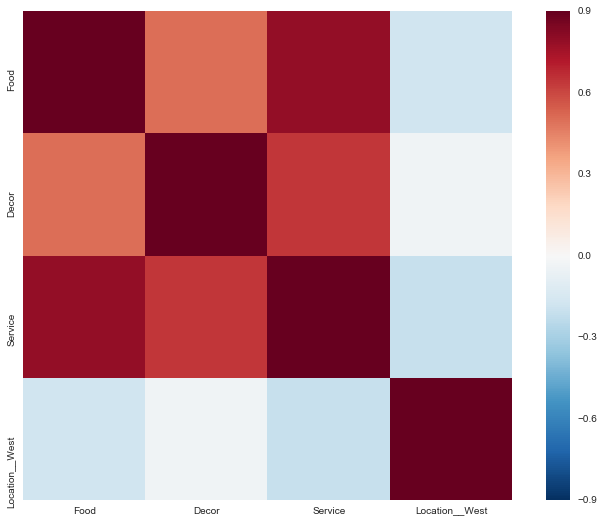

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = X.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [6]:
# split to training/test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
#ols = linear_model.LinearRegression(fit_intercept=False)
#ols

In [8]:
# fit the model
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
print "R^2 for training set:",
print ols.score(X_train, y_train)

print '-'*50

print "R^2 for test set:",
print ols.score(X_test, y_test)

R^2 for training set: 0.6793190889767817
--------------------------------------------------
R^2 for test set: 0.3601230295251494


In [9]:
ols.coef_

array([ 1.39643611,  1.87937135,  0.29545527, -1.67469429])

In [10]:
colnames = ['Food', 'Decor', 'Service', 'Location__West']
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
Food,1.396436
Decor,1.879371
Service,0.295455
Location__West,-1.674694
intercept,-24.208940


In [11]:
print "RSS: %.2f" % np.sum((ols.predict(X_test) - y_test) ** 2)

RSS: 1558.06


In [44]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print results.summary()

ImportError: cannot import name PytestTester

In [7]:
# drop service
# define x and y
X=restaurant[['Food', 'Decor', 'Location__West']]
Y=restaurant['Price']

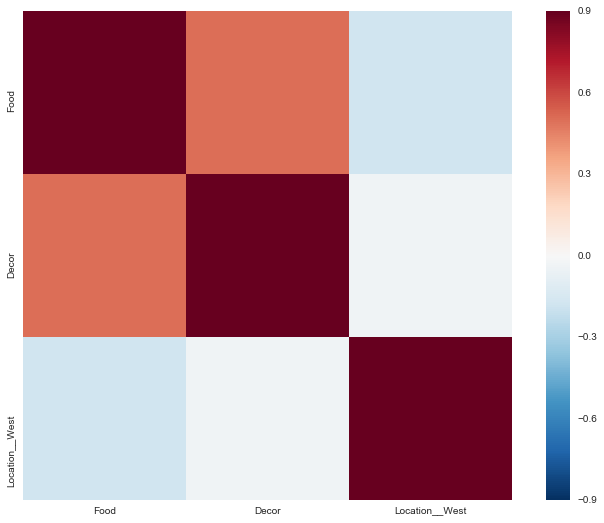

In [8]:
corrmat = X.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [10]:
# split to training/test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

/Users/shuozhang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# fit the model
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
print "R^2 for training set:",
print ols.score(X_train, y_train)

print '-'*50

print "R^2 for test set:",
print ols.score(X_test, y_test)

R^2 for training set: 0.6781538147912582
--------------------------------------------------
R^2 for test set: 0.3732523981553312


In [13]:
colnames = ['Food', 'Decor',  'Location__West']
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
Food,1.574598
Decor,1.963826
Location__West,-1.795660
intercept,-23.583872


In [14]:
print "RSS: %.2f" % np.sum((ols.predict(X_test) - y_test) ** 2)

RSS: 1526.09


In [16]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print results.summary()

ImportError: cannot import name TimeSeries